# Machine Learning

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, learning_curve, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV, LassoLars, OrthogonalMatchingPursuit, BayesianRidge, ARDRegression, PassiveAggressiveRegressor, RANSACRegressor, TheilSenRegressor, HuberRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder, StandardScaler, RobustScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor, StackingRegressor
from sklearn.metrics import confusion_matrix, classification_report

from joblib import dump
from joblib import load

import math

## Découpage du dataset

In [2]:
df = pd.read_csv('../csv/donnees_clean.csv')

In [3]:
X = df.drop('charges', axis=1)
y = df['charges']

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,Oui,southwest,16884.92
1,18,male,33.8,1,Non,southeast,1725.55
2,28,male,33.0,3,Non,southeast,4449.46
3,33,male,22.7,0,Non,northwest,21984.47
4,32,male,28.9,0,Non,northwest,3866.86
...,...,...,...,...,...,...,...
1332,50,male,31.0,3,Non,northwest,10600.55
1333,18,female,31.9,0,Non,northeast,2205.98
1334,18,female,36.9,0,Non,southeast,1629.83
1335,21,female,25.8,0,Non,southwest,2007.94


## Nettoyage des données

In [5]:
def calcul_bmi(bmi):
    if bmi < 18.5:
        return "maigreur"
    elif bmi < 25:
        return "normal"
    elif bmi < 30:
        return "surpoids"
    elif bmi < 35:
        return "obesite_moderee"
    elif bmi < 40:
        return "obesite_severe"
    else:
        return "obesite_morbide"

In [6]:
# df.sort_values('bmi', ascending=False).head(50)

In [7]:
# for i in df.index:
#     if df['smoker'][i] == 'Non':
#         df['bmi'][i] = df['bmi'][i] / 0.293656

# # df.sort_values('bmi', ascending=False).head(50)

In [8]:
X['bmi'] = X['bmi'].apply(lambda x : calcul_bmi(x))

del X['region']

X

,age,sex,bmi,children,smoker
0,19,female,surpoids,0,Oui
1,18,male,obesite_moderee,1,Non
2,28,male,obesite_moderee,3,Non
3,33,male,normal,0,Non
4,32,male,surpoids,0,Non
...,...,...,...,...,...
1332,50,male,obesite_moderee,3,Non
1333,18,female,obesite_moderee,0,Non
1334,18,female,obesite_severe,0,Non
1335,21,female,surpoids,0,Non


## Train_set & Test_set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.95, random_state=42)
X_train.head()

,age,sex,bmi,children,smoker
1302,43,male,surpoids,0,Oui
296,19,male,surpoids,0,Oui
573,62,female,obesite_severe,1,Non
1132,52,female,maigreur,0,Non
471,18,female,obesite_moderee,0,Non


## Dummy Modèle

In [10]:
dummy = DummyRegressor()

In [11]:
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

-0.004178723670794193

## Création des Modèles

In [12]:
cat_var = ['smoker', 'sex', 'bmi']
num_var = ['age', 'children']

cat_transformer = OneHotEncoder(drop='if_binary')
num_transformer = RobustScaler()

encoder = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_var),
        ('num', num_transformer, num_var)
    ], 
    remainder='passthrough'
)

In [13]:
encoder.fit_transform(X).shape

(1337, 10)

In [14]:
models = [LinearRegression(), Lasso(), Ridge(), ElasticNet(), OrthogonalMatchingPursuit(), BayesianRidge(), ARDRegression(), PassiveAggressiveRegressor(), AdaBoostRegressor(), BaggingRegressor(Lasso()), RandomForestRegressor(), ExtraTreesRegressor()]

In [15]:
for model in models:
    pipe = Pipeline([
        ('enc', encoder), 
        ('poly', PolynomialFeatures()), 
        ('model', model),
    ])

    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    score = round(score,4)

    prediction = pipe.predict(X_test)
    score_rmse = math.sqrt(mean_squared_error(y_test, prediction))

    
    print(f"Nom du modèle : {model}, R2 score : {round(score *100, 2)} %, RMSE score : {round(score_rmse,2)}")

Nom du modèle : LinearRegression(), R2 score : 90.85 %, RMSE score : 4355.83
Nom du modèle : Lasso(), R2 score : 92.83 %, RMSE score : 3854.31
Nom du modèle : Ridge(), R2 score : 92.55 %, RMSE score : 3929.39


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.816e+07, tolerance: 1.820e+07
  model = cd_fast.enet_coordinate_descent(


Nom du modèle : ElasticNet(), R2 score : 50.55 %, RMSE score : 10123.77
Nom du modèle : OrthogonalMatchingPursuit(), R2 score : 91.84 %, RMSE score : 4112.37
Nom du modèle : BayesianRidge(), R2 score : 92.61 %, RMSE score : 3914.89
Nom du modèle : ARDRegression(), R2 score : 92.8 %, RMSE score : 3863.42
Nom du modèle : PassiveAggressiveRegressor(), R2 score : 93.01 %, RMSE score : 3807.36
Nom du modèle : AdaBoostRegressor(), R2 score : 68.62 %, RMSE score : 8064.93


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.690e+07, tolerance: 1.837e+07
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.526e+08, tolerance: 1.834e+07
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duali

Nom du modèle : BaggingRegressor(estimator=Lasso()), R2 score : 93.12 %, RMSE score : 3776.4
Nom du modèle : RandomForestRegressor(), R2 score : 88.67 %, RMSE score : 4845.24
Nom du modèle : ExtraTreesRegressor(), R2 score : 83.53 %, RMSE score : 5843.25


## Amélioration des Modèles

### RamdomizedSearchCV

Params Lasso :

- alpha
- copy_X
- fit_intercept
- max_iter
- positive
- precompute
- random_state
- selection
- tol
- warm_start

Params Ridge :

- alpha
- copy_X 
- fit_intercept 
- max_iter 
- positive 
- random_state 
- solver 
- tol

Params ElasticNet :

- alpha
- copy_X 
- fit_intercept 
- l1_ratio 
- max_iter 
- positive 
- precompute 
- random_state 
- selection 
- tol 
- warm_start

Params ARDRegression :

- alpha_1
- alpha_2
- compute_score
- copy_X
- fit_intercept
- lambda_1
- lambda_2
- n_iter
- threshold_lambda
- tol
- verbose

In [16]:
# models = [Lasso(), Ridge(), ElasticNet(), ARDRegression()]

# for model in models:
#     pipe = Pipeline([
#         ('enc', encoder), 
#         ('poly', PolynomialFeatures()), 
#         ('model', model),
#     ])
    
#     string = str(model)



#     param_grid = {
#         'model__fit_intercept': [True, False],
#         'model__copy_X': [True, False],
#         'model__tol' : np.arange(1, 0.0001, -0.001)
#     }

#     if string == "Lasso()":
#         param_grid['model__alpha'] = np.arange(0.1, 1, 0.1)
#         param_grid['model__positive'] = [True, False]
#         param_grid['model__precompute'] = [True, False]
#         param_grid['model__selection'] = ['cyclic', 'random']
#         param_grid['model__warm_start'] = [True, False]
#         param_grid['model__max_iter'] = np.arange(100, 5000, 100)

#     elif string == "Ridge()":
#         param_grid['model__alpha'] = np.arange(0.1, 1, 0.1)
#         param_grid['model__solver'] = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
#         param_grid['model__positive'] = [True, False]
#         param_grid['model__max_iter'] = np.arange(100, 5000, 100)

#     elif string == "ElasticNet()":
#         param_grid['model__alpha'] = np.arange(0.1, 1, 0.1)
#         param_grid['model__positive'] = [True, False]
#         param_grid['model__precompute'] = [True, False]
#         param_grid['model__selection'] = ['cyclic', 'random']
#         param_grid['model__warm_start'] = [True, False]
#         param_grid['model__l1_ratio'] = np.arange(0.1, 1, 0.1)
#         param_grid['model__max_iter'] = np.arange(100, 5000, 100)

#     elif string == "ARDRegression()":
#         param_grid = {
#             'model__alpha_1': np.arange(0.000001, 0.0001, 0.00001),
#             'model__alpha_2': np.arange(0.000001, 0.0001, 0.00001),
#             'model__lambda_1': np.arange(0.000001, 0.0001, 0.00001),
#             'model__lambda_2': np.arange(0.000001, 0.0001, 0.00001),
#             'model__compute_score': [True, False],
#             'model__threshold_lambda': np.arange(10000, 20000, 100),
#             'model__fit_intercept': [True, False],
#             'model__copy_X': [True, False],
#         }

#     grid = RandomizedSearchCV(pipe, param_grid, cv=5, random_state=0)

#     grid.fit(X_train, y_train)

#     score = grid.best_score_
#     score = round(score,4)

#     params = grid.best_params_

#     print(f"###### Modèle : {model}, Meilleur score : {round(score *100, 2)}%, Meilleurs paramètres : {params}")

### GridSearchCV

In [17]:
# models = [Lasso(), Ridge(), ElasticNet(), ARDRegression(), BaggingRegressor()]

# for model in models:
#     pipe = Pipeline([
#         ('enc', encoder), 
#         ('poly', PolynomialFeatures()), 
#         ('model', model),
#     ])
    
#     string = str(model)

#     param_grid = {
#         'model__fit_intercept': [True, False],
#         'model__copy_X': [True, False],
#         # 'model__tol' : np.arange(1, 0.01, -0.01),
#     }

#     if string == "Lasso()":
#         param_grid['model__alpha'] = np.arange(0.1, 1, 0.1)
#         param_grid['model__positive'] = [True, False]
#         param_grid['model__precompute'] = [True, False]
#         param_grid['model__selection'] = ['cyclic', 'random']
#         param_grid['model__warm_start'] = [True, False]
#         # param_grid['model__max_iter'] = np.arange(300, 600, 10)

#     elif string == "Ridge()":
#         param_grid['model__alpha'] = np.arange(0.1, 1, 0.1)
#         param_grid['model__solver'] = ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
#         param_grid['model__positive'] = [True, False]
#         # param_grid['model__max_iter'] = np.arange(300, 600, 10)

#     elif string == "ElasticNet()":
#         param_grid['model__alpha'] = np.arange(0.1, 1, 0.1)
#         param_grid['model__positive'] = [True, False]
#         param_grid['model__precompute'] = [True, False]
#         param_grid['model__selection'] = ['cyclic', 'random']
#         param_grid['model__warm_start'] = [True, False]
#         param_grid['model__l1_ratio'] = np.arange(0.1, 1, 0.1)
#         # param_grid['model__max_iter'] = np.arange(300, 600, 10)

#     # elif string == "ARDRegression()":
#     #     param_grid = {
#     #         'model__alpha_1': np.arange(0.000001, 0.0001, 0.00001),
#     #         'model__alpha_2': np.arange(0.000001, 0.0001, 0.00001),
#     #         'model__lambda_1': np.arange(0.000001, 0.0001, 0.00001),
#     #         'model__lambda_2': np.arange(0.000001, 0.0001, 0.00001),
#     #         'model__compute_score': [True, False],
#     #         'model__threshold_lambda': np.arange(10000, 20000, 100),
#     #         'model__fit_intercept': [True, False],
#     #         'model__copy_X': [True, False],
#     #     }

#     elif string == "BaggingRegressor()":
#         param_grid = {
#             'model__estimator': [Lasso(), Ridge(), ElasticNet()],
#             'model__n_estimators': np.arange(1, 20, 1)
#         }

#     grid = GridSearchCV(pipe, param_grid, cv=5)

#     grid.fit(X_train, y_train)

#     score = grid.best_score_
#     score = round(score,4)

#     params = grid.best_params_

#     print(f"###### Modèle : {model.__class__.__name__}, Meilleur score : {round(score *100, 2)}%, Meilleurs paramètres : {params}")

### Résultats avec hyperparamètres sélectionnés

In [18]:
models = [
    Lasso(alpha=0.9, positive=True, precompute=True, warm_start=True, selection='cyclic'),
    Ridge(alpha=0.3, solver='auto'),
    ElasticNet(alpha=0.1, l1_ratio=0.9, positive=True, precompute=True, selection='random', warm_start=True),
    ARDRegression(threshold_lambda=10000, lambda_2=1e-05, lambda_1=5e-05, fit_intercept=False, copy_X=True, compute_score=False, alpha_2=7e-05, alpha_1=2e-05),
    BaggingRegressor(Lasso(alpha=0.9, positive=True, precompute=True, warm_start=True), n_estimators=14)
    ]

list_voting = []
for model in models:
    list_voting.append((f"{model.__class__.__name__}", model))

voting = StackingRegressor(list_voting, models[0])

models.append(voting)

list_models = []

for model in models:
    pipe = Pipeline([
        ('enc', encoder), 
        ('poly', PolynomialFeatures()), 
        ('model', model),
    ])

    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    score = round(score,4)

    prediction = pipe.predict(X_test)
    score_rmse = math.sqrt(mean_squared_error(y_test, prediction))

    list_models.append([f"{model.__class__.__name__}", f"{round(score *100, 2)}%", f"{round(score_rmse,2)}"])
    
    print(f"Nom du modèle : {model.__class__.__name__}, R2 score : {round(score *100, 2)}%, RMSE score : {round(score_rmse,2)}")

Nom du modèle : Lasso, R2 score : 92.67%, RMSE score : 3899.02
Nom du modèle : Ridge, R2 score : 92.76%, RMSE score : 3873.29
Nom du modèle : ElasticNet, R2 score : 87.41%, RMSE score : 5108.99
Nom du modèle : ARDRegression, R2 score : 92.68%, RMSE score : 3894.5
Nom du modèle : BaggingRegressor, R2 score : 92.64%, RMSE score : 3905.49
Nom du modèle : StackingRegressor, R2 score : 92.65%, RMSE score : 3903.06


In [19]:
df_list_models = pd.DataFrame(list_models,columns=['modele', "r2_score", "score_rmse"])

df_list_models.sort_values('r2_score', ascending=False)

,modele,r2_score,score_rmse
1,Ridge,92.76%,3873.29
3,ARDRegression,92.68%,3894.5
0,Lasso,92.67%,3899.02
5,StackingRegressor,92.65%,3903.06
4,BaggingRegressor,92.64%,3905.49
2,ElasticNet,87.41%,5108.99


## Sélection et enregistrement du Modèle

In [20]:
model = Lasso(alpha=0.9, positive=True, precompute=True, warm_start=True)

pipe = Pipeline([
    ('enc', encoder), 
    ('poly', PolynomialFeatures()), 
    ('model', model)
])

pipe.fit(X_train, y_train)
score = pipe.score(X_test, y_test)
score = round(score,4)

prediction = pipe.predict(X_test)
score_rmse = math.sqrt(mean_squared_error(y_test, prediction))

print(f"Nom du modèle : {model.__class__.__name__}, R2 score : {round(score *100, 2)}%, RMSE score : {round(score_rmse,2)}")

dump(pipe, f"../models/{model.__class__.__name__}.pkl")

Nom du modèle : Lasso, R2 score : 92.67%, RMSE score : 3899.02


['../models/Lasso.pkl']

In [21]:
model = Ridge(alpha=0.3, solver='auto')

pipe = Pipeline([
    ('enc', encoder), 
    ('poly', PolynomialFeatures()), 
    ('model', model)
])

pipe.fit(X_train, y_train)
score = pipe.score(X_test, y_test)
score = round(score,4)

prediction = pipe.predict(X_test)
score_rmse = math.sqrt(mean_squared_error(y_test, prediction))

print(f"Nom du modèle : {model.__class__.__name__}, R2 score : {round(score *100, 2)}%, RMSE score : {round(score_rmse,2)}")

dump(pipe, f"../models/{model.__class__.__name__}.pkl")

Nom du modèle : Ridge, R2 score : 92.76%, RMSE score : 3873.29


['../models/Ridge.pkl']

In [22]:
pipe = Pipeline([
    ('enc', encoder), 
    ('poly', PolynomialFeatures()), 
    ('model', voting),
])

pipe.fit(X_train, y_train)
score = pipe.score(X_test, y_test)
score = round(score,4)

prediction = pipe.predict(X_test)
score_rmse = math.sqrt(mean_squared_error(y_test, prediction))

print(f"Nom du modèle : {voting.__class__.__name__}, R2 score : {round(score *100, 2)}%, RMSE score : {round(score_rmse,2)}")

dump(pipe, f"../models/{voting.__class__.__name__}.pkl")

Nom du modèle : StackingRegressor, R2 score : 92.65%, RMSE score : 3903.06


['../models/StackingRegressor.pkl']

## Calcul des résidus

In [23]:
le_modele = load('../models/Ridge.pkl')

In [24]:
predicts = le_modele.predict(X)

# predicts = predicts ** 2

# y = y **2

residus = y - predicts

predicts

array([17330.79579887,  3684.62897762,  6344.56993391, ...,
        2930.63128193,  3098.71119136, 28712.13068389])

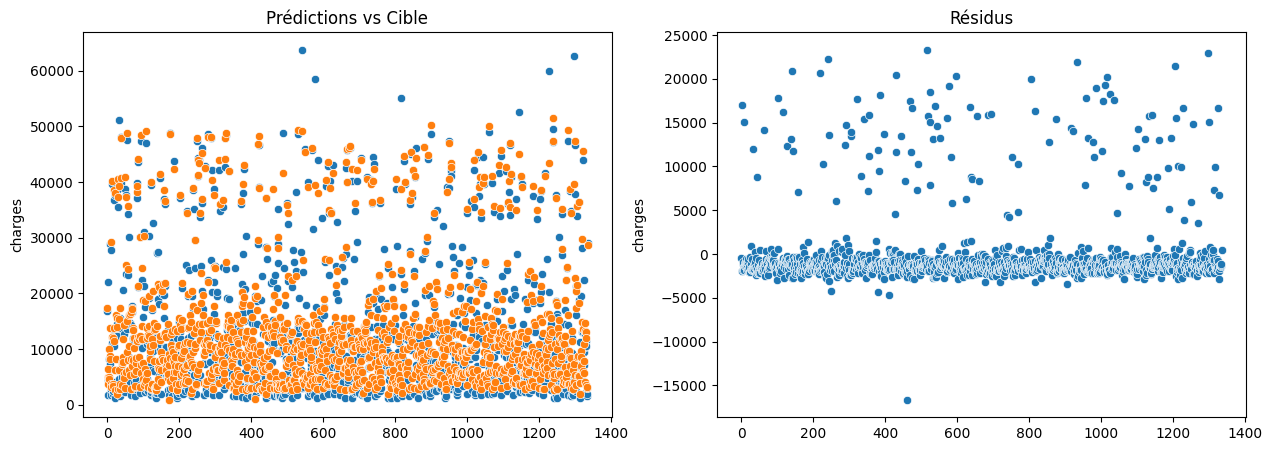

In [25]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.scatterplot(y)
sns.scatterplot(predicts)
plt.title("Prédictions vs Cible")

plt.subplot(1, 2, 2)
sns.scatterplot(residus)
plt.title("Résidus")
plt.show()

In [26]:
df_final = df.copy()
df_final['residus'] = residus
df_final['residus'] = df_final['residus'].apply(lambda x : -x if x < 0 else x)

df_final

,age,sex,bmi,children,smoker,region,charges,residus
0,19,female,27.9,0,Oui,southwest,16884.92,445.875799
1,18,male,33.8,1,Non,southeast,1725.55,1959.078978
2,28,male,33.0,3,Non,southeast,4449.46,1895.109934
3,33,male,22.7,0,Non,northwest,21984.47,16972.442526
4,32,male,28.9,0,Non,northwest,3866.86,1173.410170
...,...,...,...,...,...,...,...,...
1332,50,male,31.0,3,Non,northwest,10600.55,1295.654478
1333,18,female,31.9,0,Non,northeast,2205.98,1358.053519
1334,18,female,36.9,0,Non,southeast,1629.83,1300.801282
1335,21,female,25.8,0,Non,southwest,2007.94,1090.771191


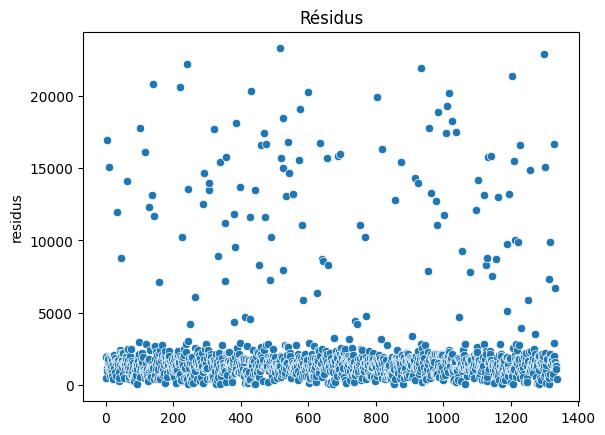

In [27]:
plt.figure()
sns.scatterplot(df_final['residus'])
plt.title("Résidus")
plt.show()

In [28]:
df[df_final['residus'] > 5000]

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.7,0,Non,northwest,21984.47
9,60,female,25.8,0,Non,northwest,28923.14
34,28,male,36.4,1,Oui,southwest,51194.56
45,55,male,37.3,0,Non,southwest,20630.28
62,64,male,24.7,1,Non,northwest,30166.62
...,...,...,...,...,...,...,...
1302,43,male,27.8,0,Oui,southwest,37829.72
1314,18,male,28.3,1,Non,northeast,11272.33
1317,35,male,39.7,4,Non,northeast,19496.72
1327,23,female,24.2,2,Non,northeast,22395.74


In [29]:
df_final = df_final[df_final['residus'] < 5000]

df_final

,age,sex,bmi,children,smoker,region,charges,residus
0,19,female,27.9,0,Oui,southwest,16884.92,445.875799
1,18,male,33.8,1,Non,southeast,1725.55,1959.078978
2,28,male,33.0,3,Non,southeast,4449.46,1895.109934
4,32,male,28.9,0,Non,northwest,3866.86,1173.410170
5,31,female,25.7,0,Non,southeast,3756.62,945.100410
...,...,...,...,...,...,...,...,...
1332,50,male,31.0,3,Non,northwest,10600.55,1295.654478
1333,18,female,31.9,0,Non,northeast,2205.98,1358.053519
1334,18,female,36.9,0,Non,southeast,1629.83,1300.801282
1335,21,female,25.8,0,Non,southwest,2007.94,1090.771191


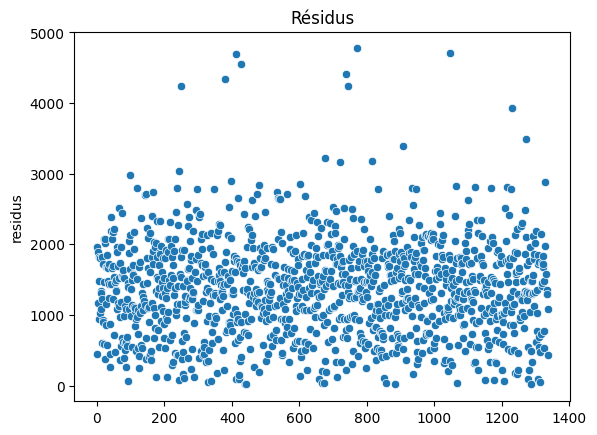

In [30]:
plt.figure()
sns.scatterplot(df_final['residus'])
plt.title("Résidus")
plt.show()

In [31]:
df_final['bmi'] = df_final['bmi'].apply(lambda x : calcul_bmi(x))

X_1 = df_final.drop(['charges', 'region', 'residus'], axis=1)
y_1 = df_final['charges']

/tmp/ipykernel_360755/892915555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['bmi'] = df_final['bmi'].apply(lambda x : calcul_bmi(x))


In [32]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, shuffle=True, train_size=0.95, random_state=42)
X_train_1.head()

,age,sex,bmi,children,smoker
946,37,male,obesite_moderee,1,Oui
580,59,male,surpoids,1,Non
1326,51,male,obesite_moderee,1,Non
838,59,female,obesite_moderee,0,Non
1179,42,female,obesite_morbide,1,Non


In [33]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = []
model = Ridge(alpha=0.3, solver='auto')

pipe = Pipeline([
    ('enc', encoder), 
    ('poly', PolynomialFeatures()), 
    ('model', model)
])
for train_index, test_index in kf.split(X_1):
    
    X_train, X_test = X_1.iloc[train_index], X_1.iloc[test_index]
    y_train, y_test = y_1.iloc[train_index], y_1.iloc[test_index]
    
    pipe.fit(X_train, y_train)

    score = pipe.score(X_test, y_test)
    scores.append(score)

mean_score = np.mean(scores)
# pipe.fit(X_train_1, y_train_1)
# score = pipe.score(X_test, y_test)
# score = round(score,4)

prediction = pipe.predict(X_test)
score_rmse = math.sqrt(mean_squared_error(y_test, prediction))

print(f"Nom du modèle : {model.__class__.__name__}, R2 score : {round(mean_score *100, 2)}%, RMSE score : {round(score_rmse,2)}")

dump(pipe, f"../models/{model.__class__.__name__}_residus.pkl")

Nom du modèle : Ridge, R2 score : 99.73%, RMSE score : 669.91


['../models/Ridge_residus.pkl']

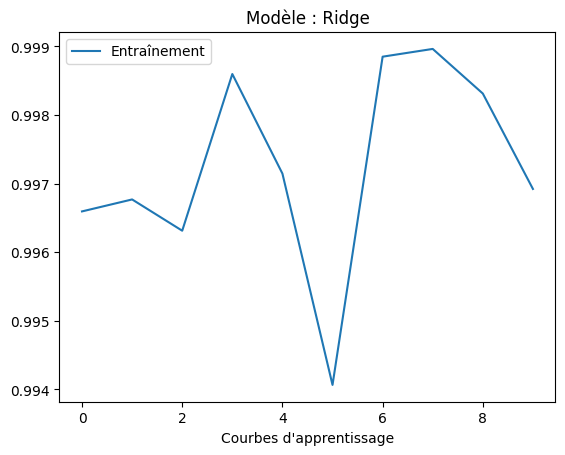

In [34]:
plt.plot(scores, label='Entraînement')
# plt.plot(N, val_score.mean(axis=1), label='Validation')
plt.title(f"Modèle : {model.__class__.__name__}")
plt.xlabel('Courbes d\'apprentissage')
plt.legend()
plt.show()

Validation croisée, df avec résidus :

In [36]:
f"Moyenne des scores : {round((cross_val_score(pipe,X,y,cv=5).mean() * 100),2)}%"

'Moyenne des scores : 85.99%'

Validation croisée, df sans résidus :

In [ ]:
f"Moyenne des scores : {round((cross_val_score(pipe,X_1,y_1,cv=5).mean() * 100),2)}%"

'Moyenne des scores : 99.71%'

In [204]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

model = load('../models/Ridge_residus.pkl')

scores = []

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # model.fit(X_train, y_train)
    
    
    score = model.score(X_test, y_test)
    scores.append(score)

mean_score = np.mean(scores)
print(f"Moyenne des scores : {round((mean_score * 100),2)}%")


Moyenne des scores : 85.39%


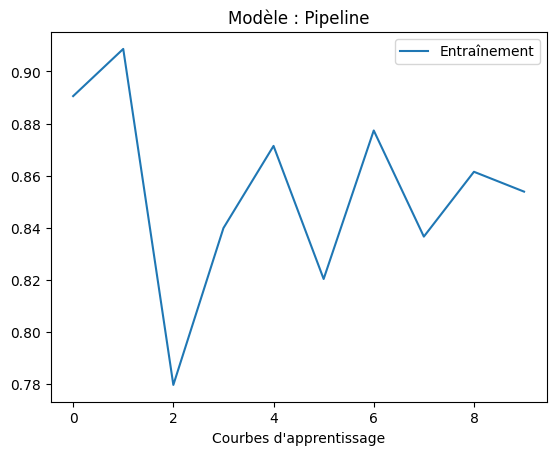

In [205]:
plt.plot(scores, label='Entraînement')
# plt.plot(N, val_score.mean(axis=1), label='Validation')
plt.title(f"Modèle : {model.__class__.__name__}")
plt.xlabel('Courbes d\'apprentissage')
plt.legend()
plt.show()


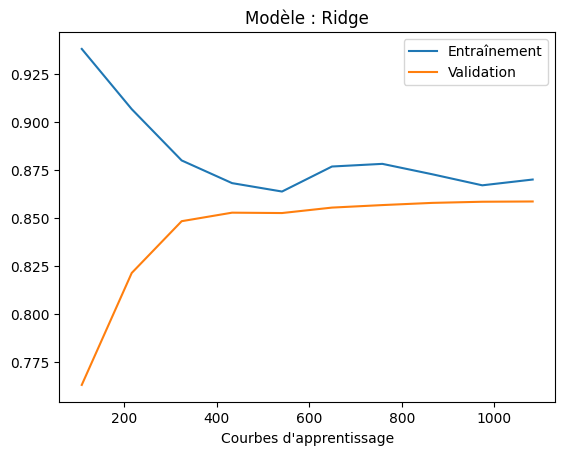

In [206]:
model = Ridge(alpha=0.3, solver='auto')

pipe = Pipeline([
    ('enc', encoder), 
    ('poly', PolynomialFeatures()), 
    ('model', model),
])

N, train_score, val_score = learning_curve(pipe, X_train, y_train, train_sizes=np.linspace(0.1,1,10), cv=10)

plt.plot(N, train_score.mean(axis=1), label='Entraînement')
plt.plot(N, val_score.mean(axis=1), label='Validation')
plt.title(f"Modèle : {model.__class__.__name__}")
plt.xlabel('Courbes d\'apprentissage')
plt.legend()
plt.show()

## Learning curves

/home/apprenant/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 430, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/pipeline.py", line 719, in score
    Xt = transform.transform(Xt)
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py", line 799, in transform

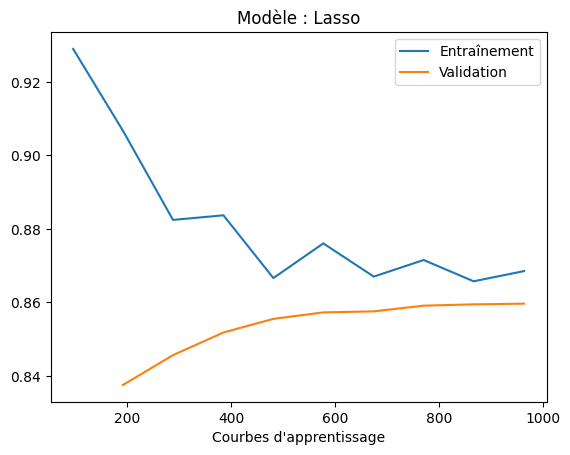

/home/apprenant/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 430, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/pipeline.py", line 719, in score
    Xt = transform.transform(Xt)
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py", line 799, in transform

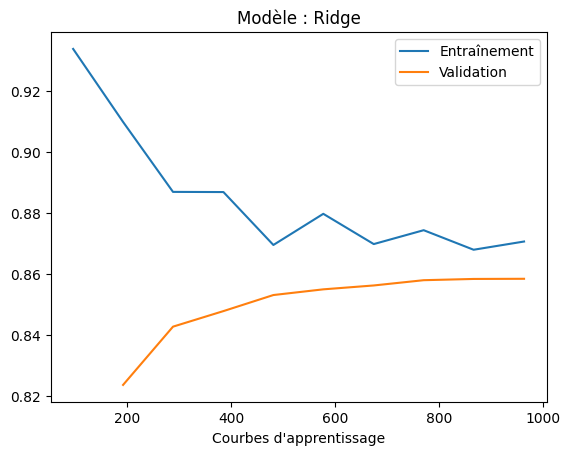

/home/apprenant/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 430, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/pipeline.py", line 719, in score
    Xt = transform.transform(Xt)
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py", line 799, in transform

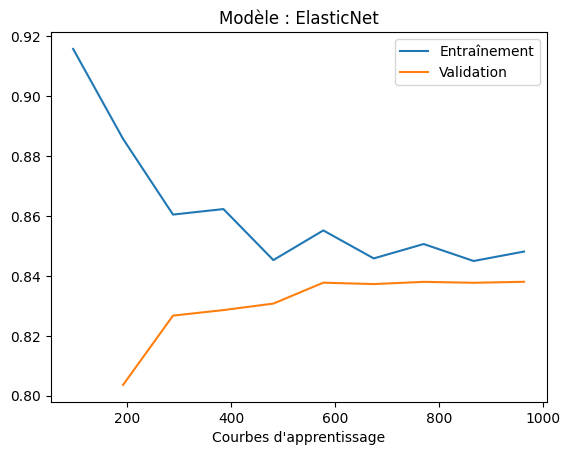

/home/apprenant/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 430, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/pipeline.py", line 719, in score
    Xt = transform.transform(Xt)
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py", line 799, in transform

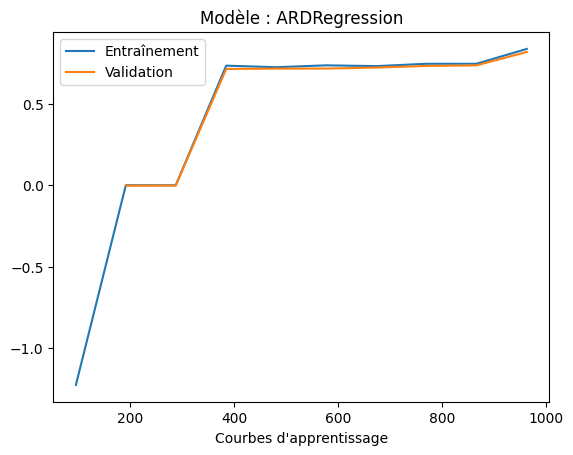

/home/apprenant/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 430, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/pipeline.py", line 719, in score
    Xt = transform.transform(Xt)
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 142, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/apprenant/.local/lib/python3.10/site-packages/sklearn/compose/_column_transformer.py", line 799, in transform

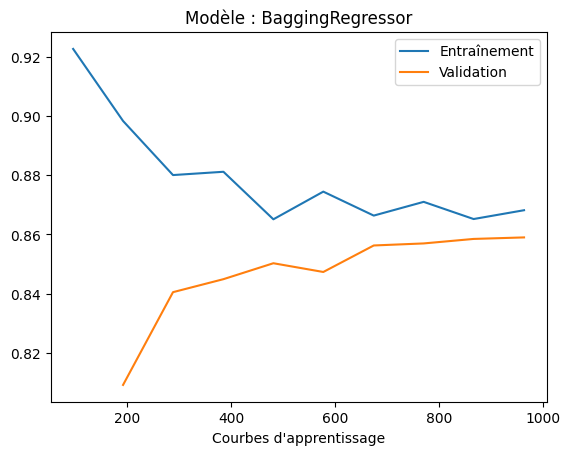

/home/apprenant/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2043297.331279993, tolerance: 824060.4682008921
  model = cd_fast.enet_coordinate_descent_gram(
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5531360.283482552, tolerance: 1156332.2815601116
  model = cd_fast.enet_coordinate_descent_gram(
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:620: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29501628.99997616, tolerance: 754704.853412869
  model = cd_fast.enet_coordinate_descent_gram(
/home/apprenant/.local/lib/python3.10/site-packages/sklearn/model_s

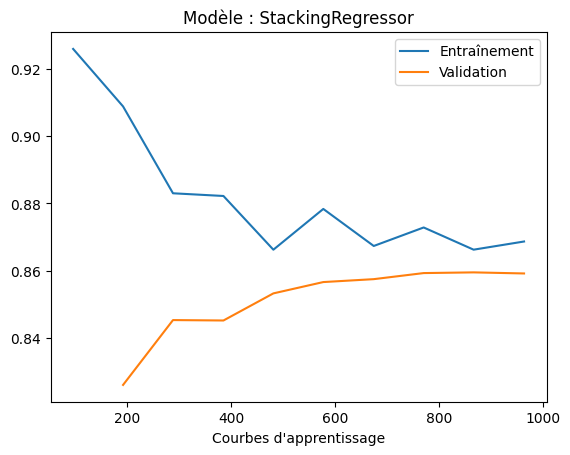

In [207]:
for model in models:
    pipe = Pipeline([
        ('enc', encoder), 
        ('poly', PolynomialFeatures()), 
        ('model', model),
    ])

    N, train_score, val_score = learning_curve(pipe, X_train, y_train, train_sizes=np.linspace(0.1,1,10), cv=5)

    # print(N)
    # print(train_score)
    # print(val_score)

    plt.plot(N, train_score.mean(axis=1), label='Entraînement')
    plt.plot(N, val_score.mean(axis=1), label='Validation')
    plt.title(f"Modèle : {model.__class__.__name__}")
    plt.xlabel('Courbes d\'apprentissage')
    plt.legend()
    plt.show()